# Introduction

This section comprises **model training**, **robust analysis**, and **model interaction**

**Model Training** consists of the following steps:

- Tokenization
- Padding
- Train Test split
- Model Training and Results

**Robust Analysis** 

This section has two purposes:

1. Check if the model understands simple concepts of monetary policy (content).

2. Observe the model's prediction in a variety of texts taken from the real world.

**Model Interaction (Only on notebook)**

This section allows the user to input any sentence and observe the model's prediction. 

## SpaCy Setup

## Imports

In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import spacy
import random
import requests
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.transforms as mtransforms




2023-12-09 13:23:03.433606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Random seed to guarantee that the results can be reproduced.
tf.keras.utils.set_random_seed(25)

# 1.1 Tokenization and Padding

In [3]:
# Load the prepared dataset
raw_dataset = pd.read_csv('gru_model/balanced_dataset.csv')
raw_dataset.drop(columns=['Unnamed: 0'], inplace=True)

# Splitting the features (text) and the labels (classification)
raw_text = raw_dataset['text'].values.tolist()
label = raw_dataset['label'].values.tolist()

# Once the text goes through tokenization and padding, its datatype will become an np array
# Therefore, we convert the label from list -> np array to avoid problems when feeding the data into the model
label_as_array = np.asarray(label)

In [4]:
# Visualize the raw text before tokenization
raw_text[0:3]

['continued strength think suggest inconsistency weakness forecast thank question related ask let appreciate tour sausage factory little bloody want commend think fairly balanced way look risk place want come interpretation answer sound significant downward revision particularly consumption factor consumer sentiment loom large forecast revise thing sound consumer sentiment particularly sensitive difficult thing forecast know volatile change rapidly hear forecast implicitly reduce consumer spending hold low period time forecast misinterpret answer',
 'far sharp rise imply volatility retrace measure interest rate imply volatility remain high reflect risk premium demand market participant follow event market base measure long date inflation compensation shift significantly intermeete period left panel exhibit staff measure year year inflation compensation fall level outset follow taper tantrum contrast dealer expectation year inflation year ahead survey steady suggest recent decline marke

In [5]:
# Load the Tokenizer and tokenize each word.
# Note that this will only create a reference for each word as shown in the diagram
# These lines of code will not 'translate' the raw text into tokens

# Create an instance of the tokenizer
tokenizer = Tokenizer(num_words=13000, split=' ')

# Create the references from the raw text
tokenizer.fit_on_texts(raw_text)

# Substitute the raw text into tokens
# Observe the raw text has not been replaced, but a 'translated copy' was created
tokenized_text = tokenizer.texts_to_sequences(raw_text)


In [6]:
# OPTIONAL
# Visualize the raw text after tokenization
tokenized_text[0:3]

[[908,
  505,
  1,
  61,
  3295,
  444,
  16,
  9,
  24,
  1406,
  162,
  103,
  706,
  5275,
  5106,
  2477,
  55,
  8954,
  27,
  2713,
  1,
  431,
  794,
  32,
  29,
  13,
  247,
  27,
  34,
  895,
  361,
  992,
  141,
  413,
  433,
  189,
  436,
  147,
  183,
  685,
  1995,
  67,
  16,
  494,
  37,
  992,
  183,
  685,
  189,
  1098,
  270,
  37,
  16,
  35,
  1295,
  19,
  797,
  188,
  16,
  1913,
  174,
  183,
  163,
  205,
  25,
  63,
  14,
  16,
  2425,
  361],
 [88,
  587,
  81,
  344,
  461,
  2307,
  105,
  53,
  2,
  344,
  461,
  46,
  30,
  170,
  13,
  446,
  118,
  3,
  140,
  219,
  457,
  3,
  138,
  105,
  18,
  274,
  4,
  496,
  301,
  378,
  871,
  63,
  376,
  104,
  244,
  73,
  105,
  6,
  6,
  4,
  496,
  123,
  39,
  1823,
  219,
  661,
  2270,
  658,
  329,
  31,
  6,
  4,
  6,
  335,
  211,
  669,
  61,
  82,
  70,
  3,
  138,
  105,
  170,
  19,
  4,
  31,
  625,
  170,
  70,
  13,
  446],
 [32,
  1,
  165,
  52,
  108,
  339,
  67,
  1,
  646,
  19,
  15

In [7]:
# Pad the sequence
padded_tokenized_text = pad_sequences(tokenized_text, maxlen=72, padding='post')

In [8]:
# OPTIONAL
# Visualize the text after padding
padded_tokenized_text[0:3]

array([[ 908,  505,    1,   61, 3295,  444,   16,    9,   24, 1406,  162,
         103,  706, 5275, 5106, 2477,   55, 8954,   27, 2713,    1,  431,
         794,   32,   29,   13,  247,   27,   34,  895,  361,  992,  141,
         413,  433,  189,  436,  147,  183,  685, 1995,   67,   16,  494,
          37,  992,  183,  685,  189, 1098,  270,   37,   16,   35, 1295,
          19,  797,  188,   16, 1913,  174,  183,  163,  205,   25,   63,
          14,   16, 2425,  361,    0,    0],
       [  88,  587,   81,  344,  461, 2307,  105,   53,    2,  344,  461,
          46,   30,  170,   13,  446,  118,    3,  140,  219,  457,    3,
         138,  105,   18,  274,    4,  496,  301,  378,  871,   63,  376,
         104,  244,   73,  105,    6,    6,    4,  496,  123,   39, 1823,
         219,  661, 2270,  658,  329,   31,    6,    4,    6,  335,  211,
         669,   61,   82,   70,    3,  138,  105,  170,   19,    4,   31,
         625,  170,   70,   13,  446,    0],
       [  32,    1,  1

# 2. Model Training

Now that the data is prepared to be fed into the model, other parts need to be setup for the model to begin training.

## 2.1 Model Architecture

For this paper, Tensorflow's Keras API is utilized.

In [9]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Input, GRU

# Neural Network Architecture (Functional method)
inputs = Input(shape=(72,))
embedding_layer = Embedding(13000, 150, input_length=72)(inputs)
dropout_1 = SpatialDropout1D(0.35)(embedding_layer)
gru_layer = GRU(150)(dropout_1)
out_layer = Dense(1, activation='sigmoid')(gru_layer)

model = Model(inputs=inputs, outputs=out_layer, name="gru_classifier")
model.summary()



Model: "gru_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72)]              0         
                                                                 
 embedding (Embedding)       (None, 72, 150)           1950000   
                                                                 
 spatial_dropout1d (Spatial  (None, 72, 150)           0         
 Dropout1D)                                                      
                                                                 
 gru (GRU)                   (None, 150)               135900    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 2086051 (7.96 MB)
Trainable params: 2086051 (7.96 MB)
Non-trainable params: 0 (0.00 Byte)
______________

## 2.2 Training Parameters

### Model Compilation

In [10]:
# Compiling the model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

loss = BinaryCrossentropy(from_logits=False)
metric = BinaryAccuracy(name='accuracy')
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=loss, metrics=metric)

### Model Training

In [11]:
# Train Test Split
# Splitting the data into training and test data
# Random state kept only for the purpose of code reproduction.

x_train, x_test, y_train, y_test = train_test_split(padded_tokenized_text, label_as_array, test_size=0.2, random_state=35)

In [12]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Begin model training
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20


777/777 [==============================] - 62s 76ms/step - loss: 0.5841 - accuracy: 0.6676 - val_loss: 0.4506 - val_accuracy: 0.7936
Epoch 2/20
777/777 [==============================] - 56s 72ms/step - loss: 0.3971 - accuracy: 0.8243 - val_loss: 0.4169 - val_accuracy: 0.8050
Epoch 3/20
777/777 [==============================] - 52s 67ms/step - loss: 0.3188 - accuracy: 0.8676 - val_loss: 0.4330 - val_accuracy: 0.8050
Epoch 4/20
777/777 [==============================] - 57s 73ms/step - loss: 0.2544 - accuracy: 0.8964 - val_loss: 0.4820 - val_accuracy: 0.8002
Epoch 5/20
777/777 [==============================] - 56s 72ms/step - loss: 0.1968 - accuracy: 0.9227 - val_loss: 0.6093 - val_accuracy: 0.7942


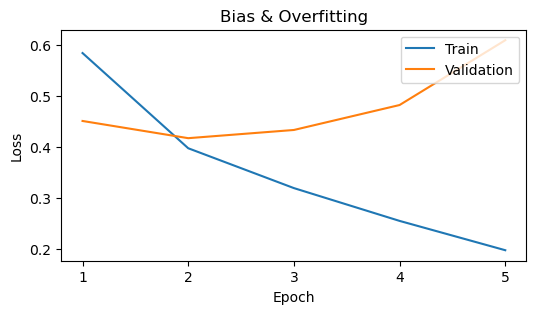

In [13]:
# Plot training & validation loss values
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Bias & Overfitting')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Set x-axis tick values to integers
plt.xticks(range(1, len(history.history['loss']) + 1))

plt.show()

### 2 epochs is a good balance between bias and underfitting

In [14]:
#latex data
x_points = range(1, len(history.history['loss']) + 1)
y_train_loss = history.history['loss']
y_val_loss = history.history['val_loss']

print("X Points:", x_points)
print("Y Train Loss:", y_train_loss)
print("Y Validation Loss:", y_val_loss)

X Points: range(1, 6)
Y Train Loss: [0.584052562713623, 0.3970714807510376, 0.3187914788722992, 0.2543531358242035, 0.19677333533763885]
Y Validation Loss: [0.4506416916847229, 0.4168505072593689, 0.43296384811401367, 0.48196500539779663, 0.6092559099197388]


# 3. Robustness Test

As mentioned earlier, this section evaluates the model on two metrics: content and source. 

It comprised three sections:

0. Functions

  Functions to help the reader focus only on the output and not on the preprocessing.

1. Content

  Some classic terms associated with prosperity and adversity economic periods will be fed into the model and the model's prediction will be analyzed.

2. Source

  Text from different sources but from in sample time periods will be classified by the model. Then the results will be analyzed.

## 3.1 Function

In [15]:
# Preparing SpaCy
nlp = spacy.load("en_core_web_md")

# POS list
pos_list = pos_list = ['ADJ', 'ADV', 'VERB', 'NOUN']

# Preparing Vocabulary
vocabulary_as_csv = pd.read_csv('gru_model/vocabulary.csv')
vocabulary = vocabulary_as_csv['word'].values.tolist()

In [16]:
def output_raw_text_model_prediction(raw_text: str, nlp, pos_list: list, vocabulary: list, tokenizer, model):
  """
  Steps:
    1) Filter the words according to the vocabulary

    2) Tokenize and pad raw text

    3) Predict economic period

    4) Output predicted label
  """
  # Step 1)

  raw_text_doc, filtered_words_list = nlp(raw_text), []

  for token in raw_text_doc:
    if token.pos_ in pos_list and token.lemma_ in vocabulary:
      filtered_words_list.append(token.lemma_)
  
  filtered_text = [' '.join(filtered_words_list)]

  # Step 2
  tokenized_text = tokenizer.texts_to_sequences(filtered_text)
  padded_tokenized_text = pad_sequences(tokenized_text, maxlen=72, padding='post')
  # Step 3
  # Activation function is sigmoid function
  raw_prediction = model.predict(padded_tokenized_text)
  raw_prediction = raw_prediction[0, 0] 

  # Transform the output to be between -1 and 1
  transformed_prediction = 2 * raw_prediction - 1

  return transformed_prediction




## 3.2 Content

In this section, some theoretical knowledge of monetary policy is tested.

### Example 1

In [17]:
text_ = "I believe that high inflation will persist throughout this period."

In [18]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 387ms/step


-0.4743688106536865

In [19]:
text_ = "In my view, the current inflation rate is transitory."

In [20]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 25ms/step


0.5827628374099731

### Example 2

In [21]:
text_ = "Lowering the interest rate to stimulate the economy."

In [22]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 26ms/step


0.4271116256713867

In [23]:
text_ = "We raise the interest rate to cool down prices."

In [24]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 25ms/step


-0.17067354917526245

### 6.2.2 Real World Examples

In this section, I use the model to classify real world text from different sources.

The idea is to test whether the model understand announcements about the economy in simple language.

Additionally, I test whether the model works on different styles of speech.

### Example 1

Janet Yellen interview with CNBC in 2017

Source: https://www.cnbc.com/2017/12/13/yellens-only-regret-as-fed-chair-low-inflation.html

In [25]:
# Normal Language
text_ = "I feel good about the economy outlook, I feel good that the labor market is in a very much stronger place than it was eight years ago. We’ve created 17 million jobs, we’ve got a good, strong labor market and a very low unemployment rate. That’s been tremendously important to the well-being of American households and workers."

In [26]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 25ms/step


0.3195308446884155

In [27]:
# Technical Language
text_ = "We have a 2 percent symmetric inflation objective. For a number of years now, inflation has been running under 2 percent, and I consider it an important priority to make sure that inflation doesn’t chronically undershoot our 2 percent objective."

In [28]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 36ms/step


0.994098424911499

### Example 2

Excerpt from Mario Draghi's (European Central Bank) speech

Source: https://www.ecb.europa.eu/press/key/date/2012/html/sp120726.en.html

In [29]:
# Talk during Euro crisis
text_ = "The progress in undertaking deficit control, structural reforms has been remarkable. And they will have to continue to do so. But the pace has been set and all the signals that we get is that they don’t relent, stop reforming themselves. It’s a complex process because for many years, very little was done – I will come to this in a moment."

In [30]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 25ms/step


0.039423465728759766

### Example 3

FOMC Statement 28 June 2000

Source: https://fraser.stlouisfed.org/title/federal-open-market-committee-meeting-minutes-transcripts-documents-677/meeting-june-27-28-2000-23199/content/pdf/20000628statement

In [31]:
text_ = "The Federal Open Market Committee at its meeting today decided to maintain the existing stance of monetary policy, keeping its target for the federal funds rate at 6-1/2 percent. Recent data suggest that the expansion of aggregate demand may be moderating toward a pace closer to the rate of growth of the economy's potential to produce. Although core measures of prices are rising slightly faster than a year ago, continuing rapid advances in productivity have been containing costs and holding down underlying price pressures. Nonetheless, signs that growth in demand is moving to a sustainable pace are still tentative and preliminary, and the utilization of the pool of available workers remains at an unusually high level. In these circumstances, and against the background of its long-term goals of price stability and sustainable economic growth and of the information currently available, the Committee believes the risks continue to be weighted mainly toward conditions that may generate heightened inflation pressures in the foreseeable future."

In [32]:
example_output = output_raw_text_model_prediction(
    raw_text=text_,
    nlp=nlp,
    pos_list=pos_list,
    vocabulary=vocabulary,
    tokenizer = tokenizer,
    model=model
)

example_output

1/1 [==============================] - 0s 39ms/step


-0.9529135413467884

### the code above was adapted from https://github.com/luissejas/central_bank_thesis.git

## Loading speeches

In [33]:
data = pd.read_csv('all_ECB_speeches.csv')
data

,date,speakers,contents
0,2023-10-25,Christine Lagarde,SPEECH Remarks delivered at the Bank of G...
1,2023-10-14,Christine Lagarde,SPEECH IMFC Statement Statement by Christ...
2,2023-10-04,Christine Lagarde,SPEECH Welcome address Welcome address by...
3,2023-09-29,Christine Lagarde,SPEECH Towards an orderly energy transitio...
4,2023-09-25,Christine Lagarde,SPEECH Hearing of the Committee on Economic...
...,...,...,...
603,2003-12-01,Jean-Claude Trichet,Testimony before the Committee on Economic a...
604,2003-11-27,Jean-Claude Trichet,The ECB's monetary policy strategy after the...
605,2003-11-26,Jean-Claude Trichet,Financial stability Speech by Jean-Claude ...
606,2003-11-20,Jean-Claude Trichet,Europe at the crossroads Speech by Jean-Cl...


# Applying sentiment analysis to the speeches

In [34]:
# Apply the function to the 'contents' column
data['contents'] = data['contents'].apply(lambda x: output_raw_text_model_prediction(x, nlp, pos_list, vocabulary, tokenizer, model))


1/1 [==============================] - 0s 20ms/step


In [35]:
data

,date,speakers,contents
0,2023-10-25,Christine Lagarde,-0.751869
1,2023-10-14,Christine Lagarde,-0.984874
2,2023-10-04,Christine Lagarde,0.933469
3,2023-09-29,Christine Lagarde,0.601212
4,2023-09-25,Christine Lagarde,-0.987747
...,...,...,...
603,2003-12-01,Jean-Claude Trichet,0.992621
604,2003-11-27,Jean-Claude Trichet,0.853705
605,2003-11-26,Jean-Claude Trichet,0.853211
606,2003-11-20,Jean-Claude Trichet,0.995271


# Adjust the dimensionality of the data


In [36]:
# Convert 'date' column to datetime and extract month
data['month'] = pd.to_datetime(data['date']).dt.to_period("M")  

# Group by month and calculate the average for the 'contents' column
data_avg = data.groupby('month')['contents'].mean().reset_index()

# save
data_avg.to_csv('sentimetal_index.csv')




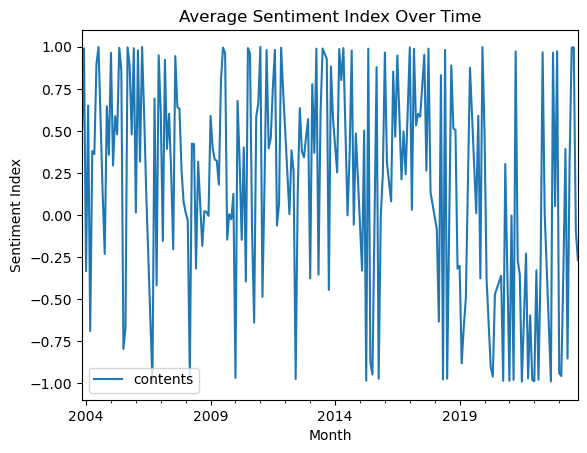

In [37]:
#plot it to make sure is correct
data_avg.plot(x='month', y='contents', kind='line')
plt.xlabel('Month')
plt.ylabel('Sentiment Index')
plt.title('Average Sentiment Index Over Time')
plt.show()


# Data Visualization

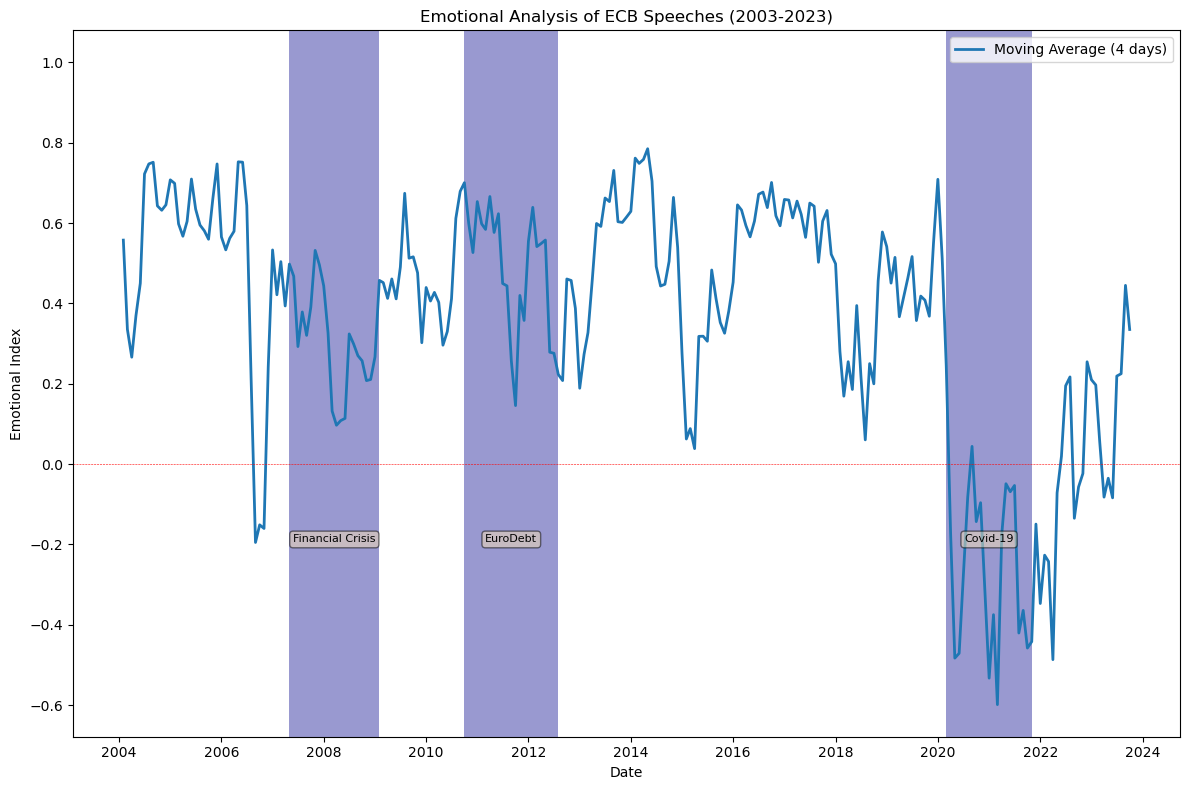

In [41]:
df = pd.read_csv('dataset.csv', sep=';')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['month'])

#Financial crisis of 2007–2008
#https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008
FinCrisis = np.logical_and(df['date'] > '2007-04', df['date'] < '2009-03')

#2020- Covid-19 Pandemic
#https://en.wikipedia.org/wiki/COVID-19_pandemic
Covid = np.logical_and(df['date'] > '2020-02', df['date'] < '2021-12')

#European debt crisis
#https://en.wikipedia.org/wiki/European_debt_crisis
EuroDebt = np.logical_and(df['date'] > '2010-09', df['date'] < '2012-09')


# Recessions calculation
Recessions = np.logical_or.reduce((FinCrisis, EuroDebt, Covid))

# Calculate moving average
window_size = 4  # moving average
df['moving_avg'] = df['emotion_index'].rolling(window_size).mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['date'], df['moving_avg'], label=f'Moving Average ({window_size} days)', linewidth=2)

# Shaded regions for recessions with the specified style
trans = plt.matplotlib.transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(df['date'], 0, 1, where=Recessions, facecolor='darkblue', alpha=0.4, transform=trans)

# Red line at y-axis value 0
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.4)

# Formatting with X-axis date label showing only every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel('Date')
ax.set_ylabel('Emotional Index')
ax.legend()

# Adding recession labels 
for period, label in zip([FinCrisis, EuroDebt, Covid],
                         ['Financial Crisis', 'EuroDebt', 'Covid-19']):
    period_indices = df.loc[period, 'date'].index
    if not period_indices.empty:
        period_midpoint = df.loc[period, 'date'].mean()
        ax.text(period_midpoint, -0.2, label, rotation=0, ha='center', va='bottom',
                fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Emotional Analysis of ECB Speeches (2003-2023)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



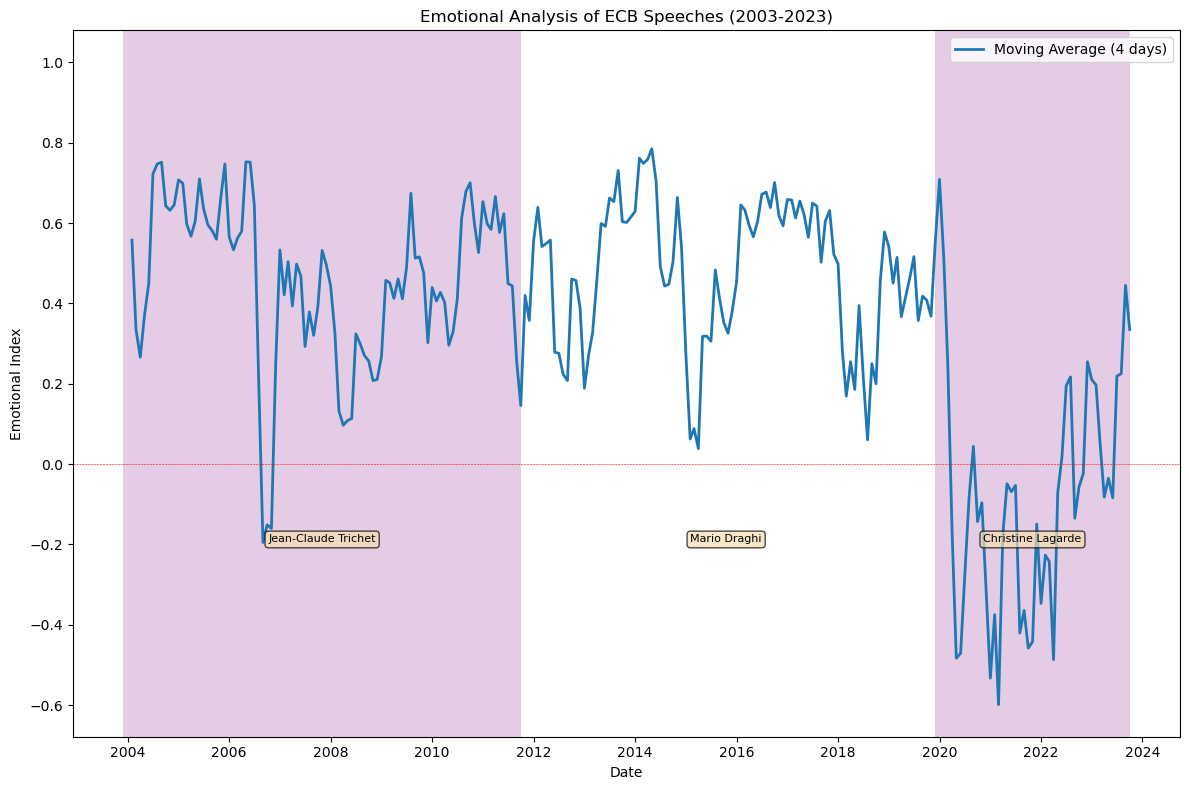

In [56]:
# ECB Presidents' Tenures
draghi_tenure = np.logical_and(df['date'] > '2011-11-01', df['date'] < '2019-10-31')
lagarde_tenure = np.logical_and(df['date'] > '2019-11-01', df['date'] < '2023-11-26')
trichet_tenure = np.logical_and(df['date'] > '2003-11-01', df['date'] < '2011-10-31')

# Shaded regions for ECB Presidents' tenures
president_tenures = np.logical_or.reduce((draghi_tenure, lagarde_tenure, trichet_tenure))

# Calculate moving average
window_size = 4  # moving average
df['moving_avg'] = df['emotion_index'].rolling(window_size).mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['date'], df['moving_avg'], label=f'Moving Average ({window_size} days)', linewidth=2)

# Shaded regions for ECB Presidents' tenures
trans = plt.matplotlib.transforms.blended_transform_factory(ax.transData, ax.transAxes)

# Adjust transparency for each president's tenure
draghi_transparency = 0
lagarde_transparency = 0.2  # Adjust as needed
trichet_transparency = 0.2 # Adjust as needed

ax.fill_between(df['date'], 0, 1, where=draghi_tenure, facecolor='darkblue', alpha=draghi_transparency, transform=trans)
ax.fill_between(df['date'], 0, 1, where=lagarde_tenure, facecolor='purple', alpha=lagarde_transparency, transform=trans)
ax.fill_between(df['date'], 0, 1, where=trichet_tenure, facecolor='purple', alpha=trichet_transparency, transform=trans)

# Red line at y-axis value 0
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.4)

# Formatting with X-axis date label showing only every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel('Date')
ax.set_ylabel('Emotional Index')
ax.legend()

# Adding president labels 
for period, label in zip([draghi_tenure, lagarde_tenure, trichet_tenure],
                         ['Mario Draghi', 'Christine Lagarde', 'Jean-Claude Trichet']):
    period_indices = df.loc[period, 'date'].index
    if not period_indices.empty:
        period_midpoint = df.loc[period, 'date'].mean()
        ax.text(period_midpoint, -0.2, label, rotation=0, ha='center', va='bottom',
                fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.title('Emotional Analysis of ECB Speeches (2003-2023)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

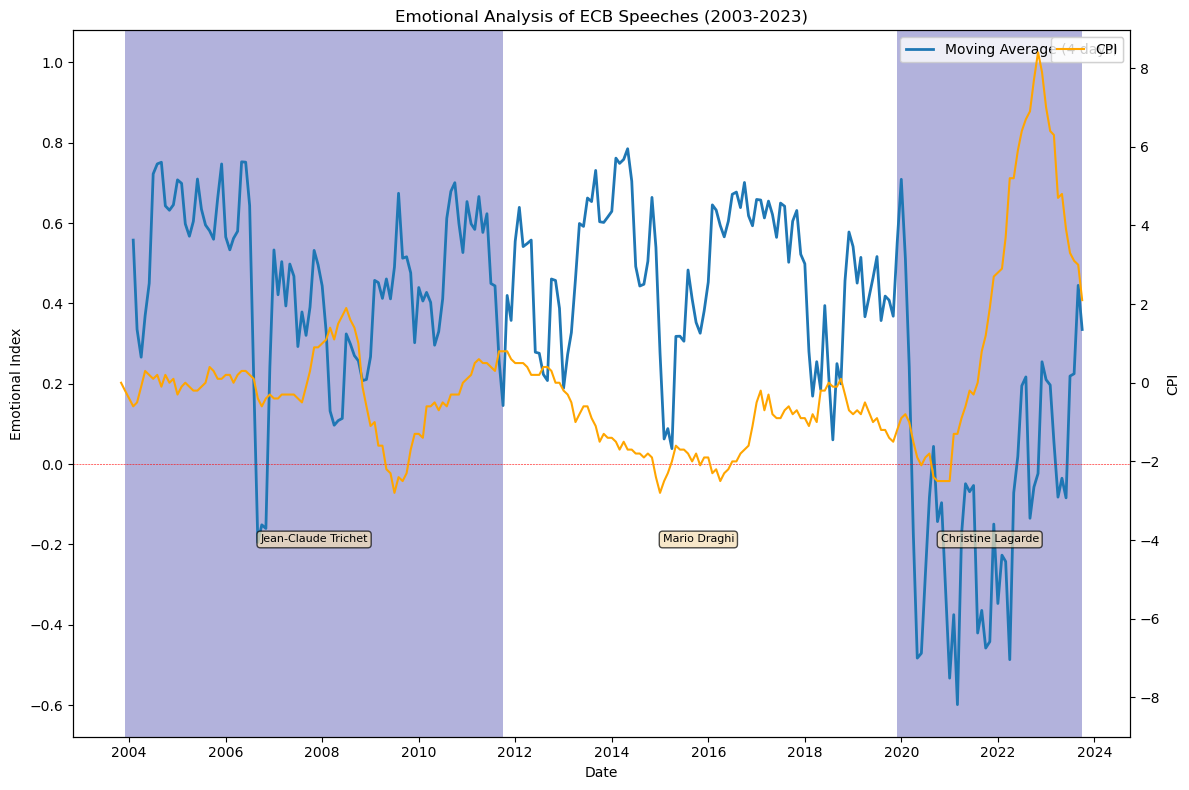

In [59]:
# ECB Presidents' Tenures
draghi_tenure = np.logical_and(df['date'] > '2011-11-01', df['date'] < '2019-10-31')
lagarde_tenure = np.logical_and(df['date'] > '2019-11-01', df['date'] < '2023-11-26')
trichet_tenure = np.logical_and(df['date'] > '2003-11-01', df['date'] < '2011-10-31')

# Shaded regions for ECB Presidents' tenures
president_tenures = np.logical_or.reduce((draghi_tenure, lagarde_tenure, trichet_tenure))

# Calculate moving average
window_size = 4  # moving average
df['moving_avg'] = df['emotion_index'].rolling(window_size).mean()

# Subtract the first value of CPI from all values in the column
df['CPI'] = df['CPI'] - df['CPI'].iloc[0]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax2 = ax.twinx()  # Create secondary y-axis

ax.plot(df['date'], df['moving_avg'], label=f'Moving Average ({window_size} days)', linewidth=2)

# Shaded regions for ECB Presidents' tenures
trans = plt.matplotlib.transforms.blended_transform_factory(ax.transData, ax.transAxes)

# Adjust transparency for each president's tenure
draghi_transparency = 0
lagarde_transparency = 0.3  # Adjust as needed
trichet_transparency = 0.3 # Adjust as needed

ax.fill_between(df['date'], 0, 1, where=draghi_tenure, facecolor='darkblue', alpha=draghi_transparency, transform=trans)
ax.fill_between(df['date'], 0, 1, where=lagarde_tenure, facecolor='darkblue', alpha=lagarde_transparency, transform=trans)
ax.fill_between(df['date'], 0, 1, where=trichet_tenure, facecolor='darkblue', alpha=trichet_transparency, transform=trans)

# Red line at y-axis value 0
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.4)

# Formatting with X-axis date label showing only every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(base=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel('Date')
ax.set_ylabel('Emotional Index')
ax.legend()

# Adding president labels 
for period, label in zip([draghi_tenure, lagarde_tenure, trichet_tenure],
                         ['Mario Draghi', 'Christine Lagarde', 'Jean-Claude Trichet']):
    period_indices = df.loc[period, 'date'].index
    if not period_indices.empty:
        period_midpoint = df.loc[period, 'date'].mean()
        ax.text(period_midpoint, -0.2, label, rotation=0, ha='center', va='bottom',
                fontsize=8, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Plot CPI on secondary y-axis
ax2.plot(df['date'], df['CPI'], color='orange', label='CPI')
ax2.set_ylim(bottom=-9)
ax2.set_ylabel('CPI')
ax2.legend()

plt.title('Emotional Analysis of ECB Speeches (2003-2023)')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
